### Predicting Customer Churn

### Environment Setup

In [3]:
#Uncomment and run once to install the package in your runtime environment
!pip install pandas_profiling

     |████████████████████████████████| 243 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 75 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 75 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 295 kB 30.4 MB/s eta 0:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=7dbcdf6ff0102928b45fb7c211f5f4b40373721f850fa0a5267111149edeea32
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107412 sha256=301600c58069966c7f801159e163968d346eb84bc221ae966e089674fbc8050e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/40/98/a3/b654f24edcdcdb87d1f70d65a506fcfdf15289db129c594bcd
Successfully built htmlmin phik
ERROR: sparkmagic 0.15.0 requires nose, which is not installed.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: 'LICENSE'

  Using cached pandas_profiling-2.11.0-py2.py3-none-a

  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)


ERROR: sparkmagic 0.15.0 requires nose, which is not installed.
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: 'LICENSE'



In [4]:
#Uncomment and run once to install the package in your runtime environment
!pip install sklearn-pandas

     |████████████████████████████████| 9.9 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 11.8 MB/s eta 0:00:01     |████████████████████████████▏   | 24.1 MB 11.8 MB/s eta 0:00:01
ERROR: sparkmagic 0.15.0 requires nose, which is not installed.
ERROR: hdijupyterutils 0.12.9 requires jupyter>=1, which is not installed.
ERROR: hdijupyterutils 0.12.9 requires nose, which is not installed.
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.6.2 which is incompatible.
ERROR: ibm-watson-machine-learning 1.0.34 has requirement pandas<=1.0.5, but you'll have pandas 1.2.3 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0


In [5]:
#Uncomment and run once to install the package in your runtime environment
#!pip install watson-machine-learning-client --upgrade
!pip install --upgrade watson-machine-learning-client-V4

     |████████████████████████████████| 1.3 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 21.0 MB/s eta 0:00:01
ERROR: sparkmagic 0.15.0 requires nose, which is not installed.
ERROR: hdijupyterutils 0.12.9 requires jupyter>=1, which is not installed.
ERROR: hdijupyterutils 0.12.9 requires nose, which is not installed.
ERROR: sklearn-pandas 2.1.0 has requirement pandas>=1.1.4, but you'll have pandas 1.0.5 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.3
    Uninstalling pandas-1.2.3:
      Successfully uninstalled pandas-1.2.3


In [6]:
import pandas as pd
import numpy as np
#import pandas_profiling
import sklearn.pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


### Step 1: Load data 

#### 1.1: Download the data files

In [7]:
customer_churn = pd.read_csv('/project_data/data_asset/churn.csv')
customer_churn.head()

ID CHURN
0   6     F
1  11     F
2  22     F
3  23     F
4  35     T

In [43]:
customer = pd.read_csv('/project_data/data_asset/customer-profile.csv')
customer.head()

ID Gender Status  Children  Est Income Car Owner        Age  \
0  11      M      S       2.0       96.33         N  56.473333   
1  14      F      M       2.0    52004.80         N  25.140000   
2  22      M      S       1.0    57626.90         Y  43.906667   
3  23      M      M       2.0    20078.00         N  32.846667   
4  35      F      S       0.0    78851.30         N  48.373333   

   AvgMonthlySpend  CustomerSupportCalls Paymethod  MembershipPlan  
0            32.88                   1.0        CC             1.0  
1            23.11                   0.0        CH             1.0  
2            38.96                   0.0        CC             2.0  
3             6.33                   0.0        CC             4.0  
4            28.66                   0.0        CC             4.0

### Step 2: Merge Files

In [9]:
data = pd.merge(customer, customer_churn, on='ID')

### Step 3: Rename some columns
This step is to remove spaces from columns names, it's an example of data preparation that you may want to do before creating a model. 

In [10]:
data.columns

Index(['ID', 'Gender', 'Status', 'Children', 'Est Income', 'Car Owner', 'Age',
       'AvgMonthlySpend', 'CustomerSupportCalls', 'Paymethod',
       'MembershipPlan', 'CHURN'],
      dtype='object')

In [11]:
data.rename(columns={'Est Income':'EstIncome', 'Car Owner':'CarOwner' }, inplace=True)

In [12]:
data.head()

ID Gender Status  Children  EstIncome CarOwner        Age  AvgMonthlySpend  \
0  11      M      S       2.0      96.33        N  56.473333            32.88   
1  22      M      S       1.0   57626.90        Y  43.906667            38.96   
2  23      M      M       2.0   20078.00        N  32.846667             6.33   
3  35      F      S       0.0   78851.30        N  48.373333            28.66   
4  36      F      S       1.0   17540.70        Y  62.786667            13.45   

   CustomerSupportCalls Paymethod  MembershipPlan CHURN  
0                   1.0        CC             1.0     F  
1                   0.0        CC             2.0     F  
2                   0.0        CC             4.0     F  
3                   0.0        CC             4.0     T  
4                   0.0      Auto             4.0     T

In [13]:
data.shape

(785, 12)

### Step 4: Data understanding

In [14]:
data.describe()

ID    Children      EstIncome         Age  AvgMonthlySpend  \
count   785.000000  785.000000     785.000000  785.000000       785.000000   
mean   1962.872611    1.131210   49411.709108   42.062616        59.886841   
std    1090.896925    0.831066   30976.276910   15.226786        57.342251   
min      11.000000    0.000000      96.330000   12.326667         0.790000   
25%    1046.000000    0.000000   19749.300000   27.746667        14.380000   
50%    1982.000000    1.000000   49910.700000   45.360000        39.620000   
75%    2871.000000    2.000000   76161.400000   54.013333        87.880000   
max    3824.000000    2.000000  120000.000000   77.000000       332.460000   

       CustomerSupportCalls  MembershipPlan  
count            785.000000      785.000000  
mean               0.114650        2.508280  
std                0.456922        1.157383  
min                0.000000        1.000000  
25%                0.000000        1.000000  
50%                0.000000        2.000000  
75%                0.000000        4.000000  
max                4.000000        4.000000

In [16]:
pandas_profiling.ProfileReport(data)

NameError: name 'pandas_profiling' is not defined

### Step 5: Build the sklearn pipeline and the Random Forest model


In [18]:
# Define input data to the model
X = data.drop(['ID','CHURN'], axis=1)

In [19]:
# Define the target variable and encode with value between 0 and n_classes-1, that is from T/F to 1/0
le = LabelEncoder()
y = le.fit_transform(data['CHURN'])

In [20]:
label_mapping=le.inverse_transform([0,1])
print('0: ', label_mapping[0])
print('1: ', label_mapping[1])

0:  F
1:  T


In [21]:
# split the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#### Use the DataFrameMapper class to declare transformations and variable imputations.

* LabelBinarizer - Converts a categorical variable into a dummy variable (aka binary variable)
* StandardScaler - Standardize features by removing the mean and scaling to unit variance, z = (x - u) / s

See docs: 
* https://github.com/scikit-learn-contrib/sklearn-pandas
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [22]:

mapper_good = DataFrameMapper([
    (['Gender'], LabelBinarizer()),
    (['Status'], LabelBinarizer()),
    (['CarOwner'], LabelBinarizer()),
    (['Paymethod'], LabelBinarizer()),
    (['MembershipPlan'], LabelBinarizer()),
    (['Children'],  StandardScaler()),
    (['EstIncome'],  StandardScaler()),
    (['Age'],  StandardScaler()),
    (['AvgMonthlySpend'],  StandardScaler()),
    (['CustomerSupportCalls'],  StandardScaler())], default=False)


In [23]:
# Instantiate the Classifier
random_forest = RandomForestClassifier(random_state=5)

# Define the steps in the pipeline to sequentially apply a list of transforms and the estimator, i.e. RandomForestClassifier
steps = [('mapper', mapper_good),('RandonForestClassifier', random_forest)]
pipeline = sklearn.pipeline.Pipeline(steps)

# train the model
model=pipeline.fit( X_train, y_train )

model

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['Gender'], LabelBinarizer()),
                                           (['Status'], LabelBinarizer()),
                                           (['CarOwner'], LabelBinarizer()),
                                           (['Paymethod'], LabelBinarizer()),
                                           (['MembershipPlan'],
                                            LabelBinarizer()),
                                           (['Children'], StandardScaler()),
                                           (['EstIncome'], StandardScaler()),
                                           (['Age'], StandardScaler()),
                                           (['AvgMonthlySpend'],
                                            StandardScaler()),
                                           (['CustomerSupportCalls'],
                                            StandardScaler())])),
   

In [24]:
# Display Label Mapping to assist with interpretation of the model
label_mapping=le.inverse_transform([0,1])
print('0: ', label_mapping[0])
print('1: ', label_mapping[1])

0:  F
1:  T


In [25]:
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report( y_test, y_prediction )

### and print the report
print(report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       127
           1       0.74      0.64      0.69       109

    accuracy                           0.73       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.73      0.73      0.73       236



###  Step 6:  Tune the model to find the best model

In [26]:
# List keys to the model param to tune
#model.get_params().keys()

In [27]:
parameters = { 'RandonForestClassifier__max_depth': [5,8,10],
               'RandonForestClassifier__n_estimators': [150,180,200]}

In [28]:
grid_obj = GridSearchCV(estimator=model, param_grid=parameters,  cv=3)

In [29]:
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)


In [30]:
# Get the estimator
best_clf = grid_fit.best_estimator_

In [31]:
best_predictions = best_clf.predict(X_test)

In [32]:
best_predictions_report = sklearn.metrics.classification_report( y_test, best_predictions )

In [33]:
print('Results of best fitted model: \n\n',best_predictions_report)

Results of best fitted model: 

               precision    recall  f1-score   support

           0       0.74      0.83      0.78       127
           1       0.77      0.65      0.71       109

    accuracy                           0.75       236
   macro avg       0.75      0.74      0.74       236
weighted avg       0.75      0.75      0.75       236



In [34]:
print('Results of default model: \n\n',report)

Results of default model: 

               precision    recall  f1-score   support

           0       0.73      0.81      0.77       127
           1       0.74      0.64      0.69       109

    accuracy                           0.73       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.73      0.73      0.73       236



In [35]:
m_step=pipeline.named_steps['mapper']

In [36]:
m_step.transformed_names_

['Gender',
 'Status_D',
 'Status_M',
 'Status_S',
 'CarOwner',
 'Paymethod_Auto',
 'Paymethod_CC',
 'Paymethod_CH',
 'MembershipPlan_1.0',
 'MembershipPlan_2.0',
 'MembershipPlan_3.0',
 'MembershipPlan_4.0',
 'Children',
 'EstIncome',
 'Age',
 'AvgMonthlySpend',
 'CustomerSupportCalls']

In [37]:
features = m_step.transformed_names_

In [38]:
# Get the features importance
importances = pipeline.named_steps['RandonForestClassifier'][1].feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

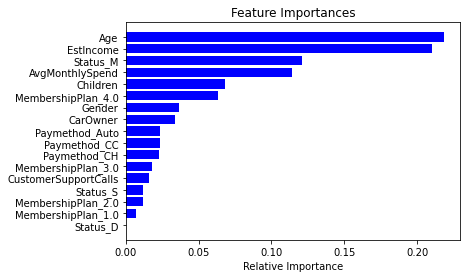

In [39]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), (np.array(features))[indices])
plt.xlabel('Relative Importance')

### Step 7: Save Model in the Project


In [40]:
# specify values for the model_name, model_tag for the model to be saved
model_name = 'customer_churn_model_el'
model_tag = 'customer_churn_model_tag_el'

In [41]:
# get the Project ID and set the location to save the model to the project
from ibm_watson_machine_learning import APIClient
import os

token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
   "token": token,
   "instance_id" : "openshift",
   "url": os.environ['RUNTIME_ENV_APSX_URL'],
   "version": "3.5"
}

client = APIClient(wml_credentials)

project_id = os.environ['PROJECT_ID']
client.set.default_project(project_id)

'SUCCESS'

In [42]:
# Provide metadata and save the model into the repository. After running this cell, the model will be displayed in the Assets view

model_name = 'customer_churn_model'
software_spec_uid = client.software_specifications.get_uid_by_name('default_py3.7')

metadata = {
    client.repository.ModelMetaNames.NAME: model_name,
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23"
}

stored_model_details = client.repository.store_model(pipeline,
                                               meta_props=metadata,
                                               training_data=X_train,
                                               training_target=y_train)

**In this version of the notebook we will perform deployment steps in the UI.**

**Author:**  Sidney Phoon and Elena Lowery<br/>
**Date:**  Dec 5th, 2019